In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def getDates2(dft):
    sal = pd.to_datetime(dft.Hora, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Vic_date_Local, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

def getLatencyPaso2_Paso1(dft):
    sal = pd.to_datetime(dft.VHPaso2, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.VHPaso1, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

def getLatencyPaso3_Paso1(dft):
    sal = pd.to_datetime(dft.VHPaso3, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.VHPaso2, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

def plotearL(col,scol):
    # plot it
    plt.rcParams['figure.dpi'] = 140
    plt.plot(col)
    plt.ylabel(scol)
    plt.show()

In [7]:
def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='test', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def Append(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    return mdtf1.append(mdtf6)

def getDates3(dft):
    sal = pd.to_datetime(dft.dateStore, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Agre_date, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]
    
def AppendAndPlot(df1,df2,df3,df4,df5,df6,
                  O_column, simbol, value, morder):
    ndf = Append(df1, df2, df3, df4, df5, df6).reset_index(drop=True)
    ndf[O_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,O_column,morder)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

In [21]:
def getDates3(dft):
    sal = pd.to_datetime(dft.Hora, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.timestamp2, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

In [23]:
dft25 = pd.read_csv('latencyRaspberry/25_4.csv')
dft25  ["test"]= "25"
lat25 = getDates3(dft25)

dft50 = pd.read_csv('latencyRaspberry/50_4.csv')
dft50  ["test"]= "50"
lat50 = getDates3(dft50)

dft75 = pd.read_csv('latencyRaspberry/75_4.csv')
dft75  ["test"]= "75"
lat75 = getDates3(dft75)

dft100 = pd.read_csv('latencyRaspberry/100_4.csv')
dft100  ["test"]= "100"
lat100 = getDates3(dft100)

dft125 = pd.read_csv('latencyRaspberry/125_4.csv')
dft125  ["test"]= "125"
lat125 = getDates3(dft125)

dft150 = pd.read_csv('latencyRaspberry/150_4.csv')
dft150  ["test"]= "150"
lat150 = getDates3(dft150)

In [14]:
morder=["25", "50", "75", "100", "125", "150"]

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


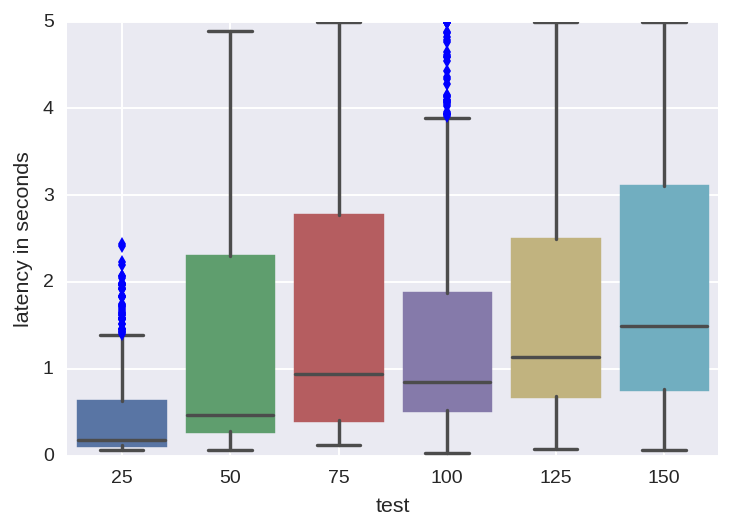

In [18]:
AppendAndPlot(lat25, lat50, lat75, lat100,
              lat125, lat150,"latency in seconds",
              "<",5,morder)